In [39]:
import heapq
from graphviz import Graph
from IPython.display import Image, display
class MSTPrim:
    def __init__(self, lag):
        self.grafo = lag
        self.mst = []
        self.costoTotal = 0
        
    def dibujaGrafo(self) -> Image:
        dibujo = Graph(format='png')
        dibujo.graph_attr['rankdir'] = 'LR'
        # Add nodes
        for nodo in self.grafo.keys():
            dibujo.node(nodo, color='red')
        # Add edges
        for nodo, vecinos in self.grafo.items():
            for vecino, peso in vecinos.items():
                if nodo < vecino:  # Avoid duplicate edges
                    label = f"Dist: {peso['distancia']} Costo: {peso['costo']}"
                    dibujo.edge(nodo, vecino, label=label, color='green1')
        # Generate image in memory (as bytes) without saving to a file
        img_bytes = dibujo.pipe(format='png')
        return Image(img_bytes)  # Display the image from bytes
    
    # Drawing the MST
    def dibujaMST(self) -> Image:
        dibujo = Graph(format='png')
        dibujo.graph_attr['rankdir'] = 'LR'
        # Convert the MST to a set of edge tuples for quick lookup
        mst_edges = {(min(tripleta[0], tripleta[1]), max(tripleta[0], tripleta[1])) for tripleta in self.mst}
        
        # Add nodes
        for nodo in self.grafo.keys():
            dibujo.node(nodo, color='red')
        
        # Add edges
        for nodo, vecinos in self.grafo.items():
            for vecino, peso in vecinos.items():
                # Ensure each edge is only drawn once
                if nodo < vecino:
                    edge_tuple = (nodo, vecino)
                    label = f"Dist: {peso['distancia']} Costo: {peso['costo']}"
                    
                    # Check if the edge is in the MST, and color it differently
                    if edge_tuple in mst_edges:
                        dibujo.edge(nodo, vecino, label=label, color='blue', penwidth='2.0')  # Highlight MST edges
                    else:
                        dibujo.edge(nodo, vecino, label=label, color='green1')  # Non-MST edges
                
        # Generate image in memory
        img_bytes = dibujo.pipe(format='png')
        return Image(img_bytes)
    
    def Prim(self, key):
        self.mst = []
        self.costoTotal = 0
        nodoInicio = next(iter(self.grafo))  # nodo inicio
        visitados = set([nodoInicio])  # conjunto para llevar el control de los nodos visitados
        aristas = [(peso[key], nodoInicio, vecino, peso) for vecino, peso in self.grafo[nodoInicio].items()]
        heapq.heapify(aristas)  # amontonamiento para formar una cola de prioridad
        
        while aristas:
            valorArista, nodo, nodoVecino, peso = heapq.heappop(aristas)
            if nodoVecino not in visitados:
                visitados.add(nodoVecino)
                self.mst.append((nodo, nodoVecino, peso))
                self.costoTotal += peso[key]
                for siguienteNodoVecino, siguientePeso in self.grafo[nodoVecino].items():
                    if siguienteNodoVecino not in visitados:
                        heapq.heappush(aristas, (siguientePeso[key], nodoVecino, siguienteNodoVecino, siguientePeso))
    
    def getMST(self):
        return self.mst
    
    def getCostoTotal(self):
        return self.costoTotal

grafo = {
    'A': {'B': {'distancia': 5, 'costo': 10}, 'C': {'distancia': 3, 'costo': 4}, 'D': {'distancia': 7, 'costo': 8}},
    'B': {'A': {'distancia': 5, 'costo': 10}, 'D': {'distancia': 2, 'costo': 3}, 'E': {'distancia': 4, 'costo': 5}},
    'C': {'A': {'distancia': 3, 'costo': 4}, 'F': {'distancia': 4, 'costo': 2}, 'E': {'distancia': 5, 'costo': 6}},
    'D': {'B': {'distancia': 2, 'costo': 3}, 'E': {'distancia': 1, 'costo': 1}, 'A': {'distancia': 7, 'costo': 8}},
    'E': {'D': {'distancia': 1, 'costo': 1}, 'F': {'distancia': 6, 'costo': 8}, 'B': {'distancia': 4, 'costo': 5}, 'C': {'distancia': 5, 'costo': 6}},
    'F': {'C': {'distancia': 4, 'costo': 2}, 'E': {'distancia': 6, 'costo': 8}, 'B': {'distancia': 7, 'costo': 9}},
}

# Crear el objeto MSTPrim
mst = MSTPrim(grafo)


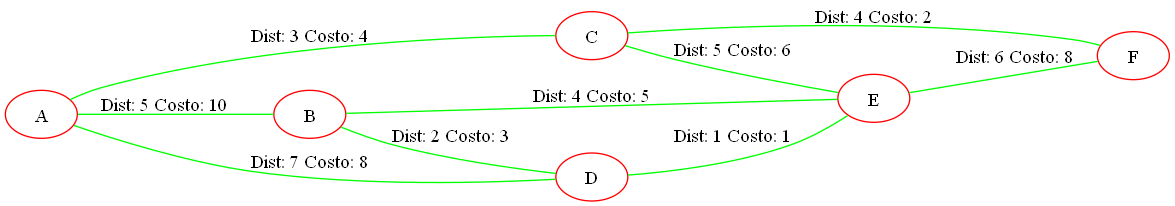

In [40]:
# Dibujar el grafo original
grafo_original = mst.dibujaGrafo()
display(grafo_original)

Costo total del MST en función de la distancia: 15


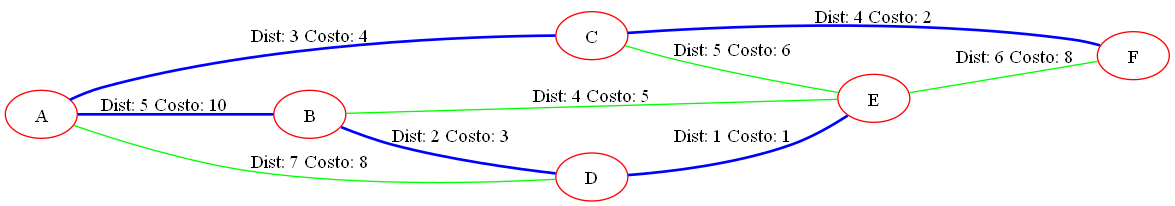

In [41]:
# Hallar el MST en función de la distancia y dibujarlo, y la distancia total
mst.Prim('distancia')
mst_distancia = mst.dibujaMST()
costo_total_distancia = mst.getCostoTotal()

print(f"Costo total del MST en función de la distancia: {costo_total_distancia}")
display(mst_distancia)


Costo total del MST en función del costo: 16


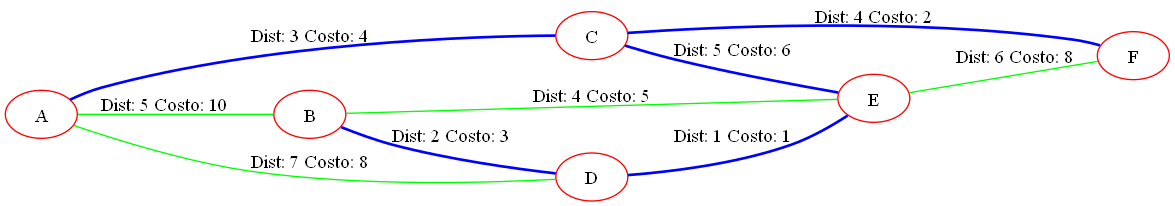

In [42]:
# Hallar el MST en función del costo y dibujarlo, y el costo tolal
mst.Prim('costo')
mst_costo = mst.dibujaMST()
costo_total_costo = mst.getCostoTotal()

print(f"Costo total del MST en función del costo: {costo_total_costo}")
display(mst_costo)